In [2]:
import pandas as pd

# read csv file "data/Airbnb_Open_Data.csv"
df = pd.read_csv("data/Airbnb_Open_Data.csv")

# check out the first 5 rows of the data
print(df.head())
print("Length of data:", len(df))

        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United St

C:\Users\finns\AppData\Local\Temp\ipykernel_25184\481150830.py:4: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/Airbnb_Open_Data.csv")


In [3]:
# rename all columns to have no spaces (replace with _)
df.columns = [col.replace(" ", "_") for col in df.columns]

In [4]:
# drop rows where df['number_of_reviews'][i] < 10 or np.isnan(df['review_rate_number'][i]), cause they are not useful for our analysis
df = df.dropna(subset=['house_rules'])
df = df.dropna(subset=['review_rate_number'])
df = df[df['number_of_reviews'] >= 10]

print(df.head())
print("Length of data:", len(df))

        id                                       NAME      host_id  \
1  1002102                      Skylit Midtown Castle  52335172823   
5  1004098  Large Cozy 1 BR Apartment In Midtown East  45498551794   
6  1004650                            BlissArtsSpace!  61300605564   
7  1005202                            BlissArtsSpace!  90821839709   
8  1005754            Large Furnished Room Near B'way  79384379533   

  host_identity_verified host_name neighbourhood_group       neighbourhood  \
1               verified     Jenna           Manhattan             Midtown   
5               verified  Michelle           Manhattan         Murray Hill   
6                    NaN   Alberta            Brooklyn  Bedford-Stuyvesant   
7            unconfirmed      Emma            Brooklyn  Bedford-Stuyvesant   
8               verified    Evelyn           Manhattan      Hell's Kitchen   

        lat      long        country  ... service_fee minimum_nights  \
1  40.75362 -73.98377  United States  

In [13]:
from transformers import pipeline

model_name = "SamLowe/roberta-base-go_emotions"
# save all results, not only the best one
sentiment_pipeline = pipeline("sentiment-analysis", model=model_name, return_all_scores=True)


config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

C:\Users\finns\OneDrive\Desktop\Studium\_Data Science\data_science_finn\pythonProject\.venv\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\finns\.cache\huggingface\hub\models--SamLowe--roberta-base-go_emotions. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

C:\Users\finns\OneDrive\Desktop\Studium\_Data Science\data_science_finn\pythonProject\.venv\Lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [15]:
texts = list(df.house_rules.values)

# limit texts to 500
# texts_shortened = texts[:50]
texts_shortened = texts
results = sentiment_pipeline(texts_shortened)

# for text, result, review in zip(texts_shortened, results, df.review_rate_number.values):
#     print("=" * 100)
#     # print(result)
#     # print(type(result))
#     print(f"Text: {text}")
#     for res in result:
#         print(f"{res['label']}: {round(res['score'], 2)}")
#     print(f"Original: {review}")

print("length of results:", len(results))

length of results: 21129


In [ ]:
# create a new dataframe that contains the results of the sentiment analysis

df_emotion = pd.DataFrame(columns=['negative', 'neutral', 'positive'])

In [16]:
# save temporary as pickle
import pickle

with open("data/sentiment_results_emotion.pkl", "wb") as f:
    pickle.dump(results, f)
    


In [28]:
print(results[0])

[{'label': 'admiration', 'score': 0.01338986400514841}, {'label': 'amusement', 'score': 0.0005845680134370923}, {'label': 'anger', 'score': 0.0005323132500052452}, {'label': 'annoyance', 'score': 0.0029036104679107666}, {'label': 'approval', 'score': 0.5582907199859619}, {'label': 'caring', 'score': 0.01263196486979723}, {'label': 'confusion', 'score': 0.004202996380627155}, {'label': 'curiosity', 'score': 0.003431458957493305}, {'label': 'desire', 'score': 0.00700179859995842}, {'label': 'disappointment', 'score': 0.0014640792505815625}, {'label': 'disapproval', 'score': 0.005612527020275593}, {'label': 'disgust', 'score': 0.0005848330329172313}, {'label': 'embarrassment', 'score': 0.00017730536637827754}, {'label': 'excitement', 'score': 0.002603720175102353}, {'label': 'fear', 'score': 0.0005695172003470361}, {'label': 'gratitude', 'score': 0.0007708968478254974}, {'label': 'grief', 'score': 0.0002298080362379551}, {'label': 'joy', 'score': 0.002873722929507494}, {'label': 'love', '

In [29]:
df_results = pd.DataFrame(columns=['admiration', 'amusement', 'approval', 'caring', 'curiosity', 'excitement', 'gratitude', 'joy', 'love', 'optimism', 'pride', 'relief', 'realization', 'surprise', 'neutral', 'sadness', 'anger', 'annoyance', 'confusion', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'fear', 'grief', 'nervousness', 'remorse'])
for i, result in enumerate(results):
    for res in result:
        df_results.loc[i, res['label']] = res['score']
            
print(df_results.head())

  admiration amusement  approval    caring curiosity excitement gratitude  \
0    0.01339  0.000585  0.558291  0.012632  0.003431   0.002604  0.000771   
1   0.002054  0.000755  0.068995  0.002549  0.001083    0.00072  0.000696   
2   0.004016  0.000739  0.108427  0.524323  0.001717   0.000984  0.003177   
3     0.0282  0.003264  0.067325   0.17121  0.001989   0.010394  0.881822   
4   0.004142  0.001194   0.06875  0.752582  0.002718   0.000995   0.00272   

        joy      love  optimism  ... confusion    desire disappointment  \
0  0.002874  0.010747  0.019884  ...  0.004203  0.007002       0.001464   
1  0.001248  0.001245  0.002133  ...  0.002071  0.000978        0.00161   
2  0.002539  0.003724   0.01304  ...  0.001344  0.007369       0.003429   
3  0.105683  0.002469  0.050688  ...  0.001787  0.006512       0.000802   
4  0.002772  0.003038  0.016201  ...  0.003276  0.005548       0.003259   

  disapproval   disgust embarrassment      fear     grief nervousness  \
0    0.005613

21129

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# # Emotionen in DataFrame umwandeln
# emotion_labels = [res['label'] for res in results[0]]
# emotion_data = []
# 
# for result in results:
#     scores = [res['score'] for res in result]
#     emotion_data.append(scores)

df_emotions = df_results

# Emotionen kategorisieren
positive_emotions = ['admiration', 'amusement', 'approval', 'caring', 'curiosity', 'excitement', 'gratitude', 'joy', 'love', 'optimism', 'pride', 'relief']
neutral_emotions = ['realization', 'surprise', 'neutral', 'sadness']
negative_emotions = ['anger', 'annoyance', 'confusion', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'fear', 'grief', 'nervousness', 'remorse']

# Berechnung der Scores
df_emotions['positive_score'] = df_emotions[positive_emotions].sum(axis=1)
df_emotions['neutral_score'] = df_emotions[neutral_emotions].sum(axis=1)
df_emotions['negative_score'] = df_emotions[negative_emotions].sum(axis=1)

# Berechnung eines allgemeinen Sentiment-Scores
df_emotions['sentiment_score'] = df_emotions['positive_score'] - df_emotions['negative_score']

df_emotions.head()



,admiration,amusement,approval,caring,curiosity,excitement,gratitude,joy,love,optimism,...,disgust,embarrassment,fear,grief,nervousness,remorse,positive_score,neutral_score,negative_score,sentiment_score
0,0.01339,0.000585,0.558291,0.012632,0.003431,0.002604,0.000771,0.002874,0.010747,0.019884,...,0.000585,0.000177,0.00057,0.00023,0.000482,0.000369,0.627821,0.611394,0.024129,0.603692
1,0.002054,0.000755,0.068995,0.002549,0.001083,0.00072,0.000696,0.001248,0.001245,0.002133,...,0.001117,0.000256,0.000625,0.000179,0.00023,0.000191,0.082154,0.927528,0.024712,0.057441
2,0.004016,0.000739,0.108427,0.524323,0.001717,0.000984,0.003177,0.002539,0.003724,0.01304,...,0.00171,0.000713,0.001277,0.000966,0.001296,0.001922,0.668006,0.617957,0.072597,0.595409
3,0.0282,0.003264,0.067325,0.17121,0.001989,0.010394,0.881822,0.105683,0.002469,0.050688,...,0.000631,0.00048,0.00095,0.000909,0.000907,0.001757,1.348552,0.032502,0.02765,1.320902
4,0.004142,0.001194,0.06875,0.752582,0.002718,0.000995,0.00272,0.002772,0.003038,0.016201,...,0.001405,0.001003,0.00495,0.001671,0.004656,0.002985,0.861802,0.435556,0.085238,0.776564


In [35]:
# combine with the original df (only take the rows that have a sentiment analysis result)
df_combined = df[:len(df_emotions)]
df_combined = df_combined.reset_index(drop=True)

df_combined = pd.concat([df_combined, df_emotions], axis=1)

print(df_combined.head())
print(len(df_combined))

        id                                       NAME      host_id  \
0  1002102                      Skylit Midtown Castle  52335172823   
1  1004098  Large Cozy 1 BR Apartment In Midtown East  45498551794   
2  1004650                            BlissArtsSpace!  61300605564   
3  1005202                            BlissArtsSpace!  90821839709   
4  1005754            Large Furnished Room Near B'way  79384379533   

  host_identity_verified host_name neighbourhood_group       neighbourhood  \
0               verified     Jenna           Manhattan             Midtown   
1               verified  Michelle           Manhattan         Murray Hill   
2                    NaN   Alberta            Brooklyn  Bedford-Stuyvesant   
3            unconfirmed      Emma            Brooklyn  Bedford-Stuyvesant   
4               verified    Evelyn           Manhattan      Hell's Kitchen   

        lat      long        country  ...   disgust embarrassment      fear  \
0  40.75362 -73.98377  United S

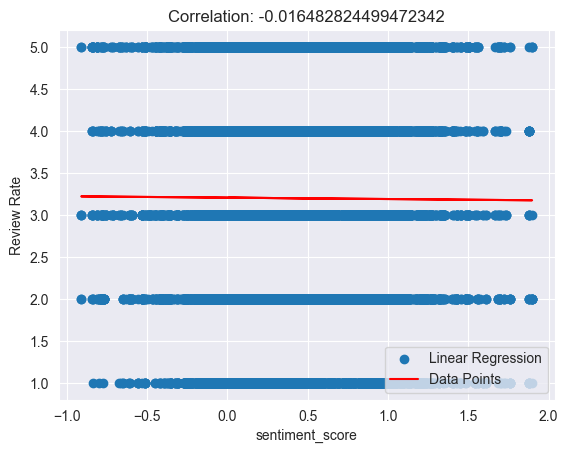

In [36]:
# plot the correlation between the sentiment score and the review rate
import matplotlib.pyplot as plt

plt.scatter(df_combined['sentiment_score'], df_combined['review_rate_number'])
plt.xlabel("sentiment_score")
plt.ylabel("Review Rate")

# linear regression
from sklearn.linear_model import LinearRegression

X = df_combined['sentiment_score'].values.reshape(-1, 1)
y = df_combined['review_rate_number'].values

reg = LinearRegression().fit(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.legend(["Linear Regression", "Data Points"])
plt.title(f"Correlation: {reg.coef_[0]}")

plt.show()

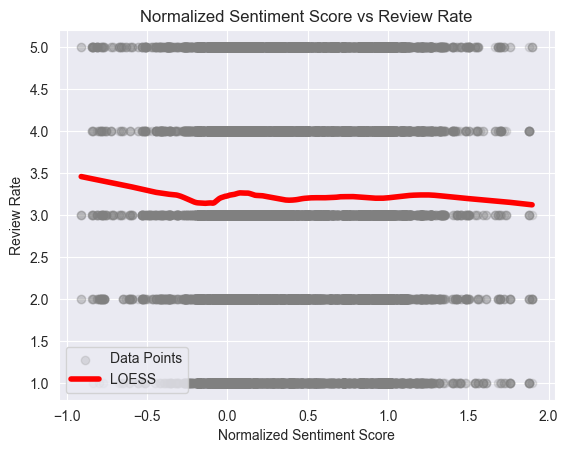

In [37]:
import statsmodels.api as sm

# Daten vorbereiten
X = df_combined['sentiment_score'].values
y = df_combined['review_rate_number'].values

# LOESS
lowess = sm.nonparametric.lowess
y_pred = lowess(y, X, frac=0.3)

# Plot
plt.scatter(X, y, label='Data Points', color='grey', alpha=0.2)
plt.title("Normalized Sentiment Score vs Review Rate")
plt.plot(y_pred[:, 0], y_pred[:, 1], label='LOESS', color='red', linewidth=4)
plt.xlabel("Normalized Sentiment Score")
plt.ylabel("Review Rate")

plt.legend()
plt.show()

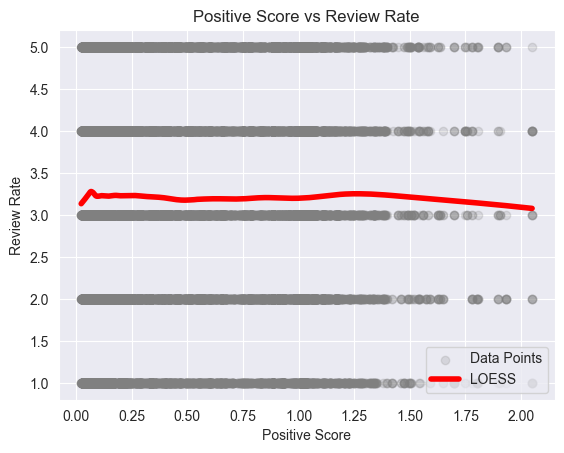

In [38]:
import statsmodels.api as sm

# Daten vorbereiten
X = df_combined['positive_score'].values
y = df_combined['review_rate_number'].values

# LOESS
lowess = sm.nonparametric.lowess
y_pred = lowess(y, X, frac=0.3)

# Plot
plt.scatter(X, y, label='Data Points', color='grey', alpha=0.2)
plt.title("Positive Score vs Review Rate")
plt.plot(y_pred[:, 0], y_pred[:, 1], label='LOESS', color='red', linewidth=4)
plt.xlabel("Positive Score")
plt.ylabel("Review Rate")

plt.legend()
plt.show()

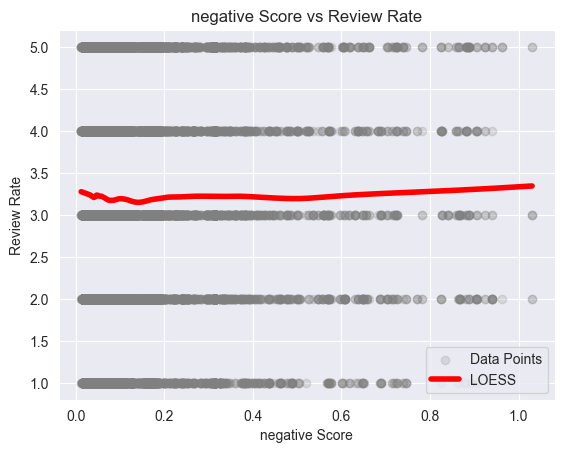

In [39]:
import statsmodels.api as sm

# Daten vorbereiten
X = df_combined['negative_score'].values
y = df_combined['review_rate_number'].values

# LOESS
lowess = sm.nonparametric.lowess
y_pred = lowess(y, X, frac=0.3)

# Plot
plt.scatter(X, y, label='Data Points', color='grey', alpha=0.2)
plt.title("negative Score vs Review Rate")
plt.plot(y_pred[:, 0], y_pred[:, 1], label='LOESS', color='red', linewidth=4)
plt.xlabel("negative Score")
plt.ylabel("Review Rate")

plt.legend()
plt.show()

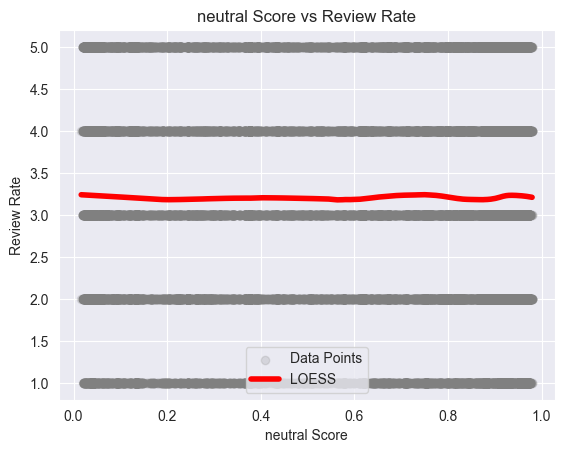

In [40]:
import statsmodels.api as sm

# Daten vorbereiten
X = df_combined['neutral_score'].values
y = df_combined['review_rate_number'].values

# LOESS
lowess = sm.nonparametric.lowess
y_pred = lowess(y, X, frac=0.3)

# Plot
plt.scatter(X, y, label='Data Points', color='grey', alpha=0.2)
plt.title("neutral Score vs Review Rate")
plt.plot(y_pred[:, 0], y_pred[:, 1], label='LOESS', color='red', linewidth=4)
plt.xlabel("neutral Score")
plt.ylabel("Review Rate")

plt.legend()
plt.show()

In [41]:
# print first 5 house rules with review rate and positive score and negative score
for i in range(5):
    print("=" * 100)
    print(f"House Rules: {df_combined.house_rules[i]}")
    print(f"Review Rate: {df_combined.review_rate_number[i]}")
    print(f"Positive Score: {df_combined.positive_score[i]}")
    print(f"Negative Score: {df_combined.negative_score[i]}")

House Rules: Pet friendly but please confirm with me if the pet you are planning on bringing with you is OK. I have a cute and quiet mixed chihuahua. I could accept more guests (for an extra fee) but this also needs to be confirmed beforehand. Also friends traveling together could sleep in separate beds for an extra fee (the second bed is either a sofa bed or inflatable bed). Smoking is only allowed on the porch.
Review Rate: 4.0
Positive Score: 0.6278206629212946
Negative Score: 0.024129065830493346
House Rules: No smoking, please, and no drugs.
Review Rate: 3.0
Positive Score: 0.08215363684576005
Negative Score: 0.024712159065529704
House Rules: Please no shoes in the house so bring slippers or extra socks to keep your feet warm- especially in winter! No smoking either inside or outside. Please be considerate of neighbors from 10pm-7am in terms of noise. Please take out any trash and leave in the large blue garbage bin at the end of the driveway when you leave.
Review Rate: 5.0
Posit

In [45]:
# create a list of correlation values for each individual emotion and the review rate
correlation_values = []
for emotion in df_results.columns:
    if emotion == "neutral":
        continue
    X = df_combined[emotion].values
    y = df_combined['review_rate_number'].values

    reg = LinearRegression().fit(X.reshape(-1, 1), y)
    correlation_values.append((emotion, reg.coef_[0]))

correlation_values = sorted(correlation_values, key=lambda x: x[1], reverse=True)
for emotion, correlation in correlation_values:
    print(f"{emotion}: {round(correlation, 2)}")


surprise: 27.2
fear: 10.85
grief: 5.52
nervousness: 4.92
embarrassment: 2.15
disappointment: 2.08
pride: 1.17
confusion: 1.08
curiosity: 0.92
realization: 0.78
sadness: 0.21
excitement: 0.14
remorse: 0.13
disapproval: 0.12
gratitude: 0.06
admiration: 0.06
negative_score: 0.02
neutral_score: 0.02
love: 0.01
sentiment_score: -0.02
positive_score: -0.02
approval: -0.02
caring: -0.08
joy: -0.19
optimism: -0.24
amusement: -0.29
desire: -0.52
annoyance: -0.65
anger: -1.92
relief: -3.22
disgust: -6.29


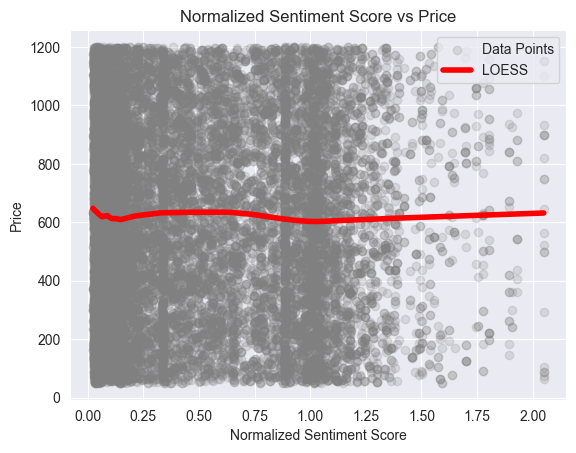

In [47]:
# do the same but for sentiment score and price. price column values are in format of $1,095 so we need to remove the $ and , and convert to float
df_combined['price'] = df_combined['price'].apply(lambda x: float(str(x).replace("$", "").replace(",", "")))

# Daten vorbereiten
X = df_combined['positive_score'].values
y = df_combined['price'].values

# LOESS
lowess = sm.nonparametric.lowess
y_pred = lowess(y, X, frac=0.3)

# Plot
plt.scatter(X, y, label='Data Points', color='grey', alpha=0.2)
plt.title("Normalized Sentiment Score vs Price")
plt.plot(y_pred[:, 0], y_pred[:, 1], label='LOESS', color='red', linewidth=4)
plt.xlabel("Normalized Sentiment Score")
plt.ylabel("Price")
plt.legend()
plt.show()

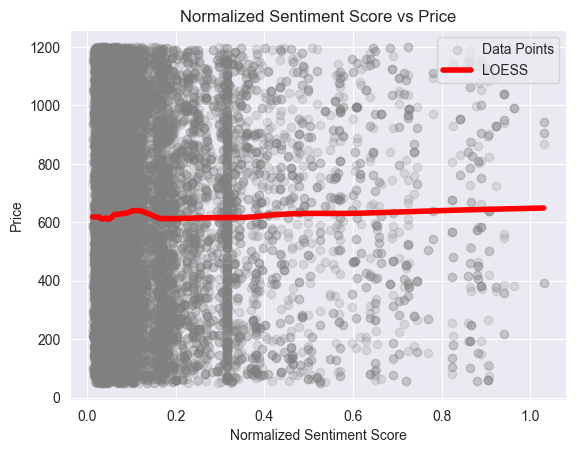

In [48]:
# Daten vorbereiten
X = df_combined['negative_score'].values
y = df_combined['price'].values

# LOESS
lowess = sm.nonparametric.lowess
y_pred = lowess(y, X, frac=0.3)

# Plot
plt.scatter(X, y, label='Data Points', color='grey', alpha=0.2)
plt.title("Normalized Sentiment Score vs Price")
plt.plot(y_pred[:, 0], y_pred[:, 1], label='LOESS', color='red', linewidth=4)
plt.xlabel("Normalized Sentiment Score")
plt.ylabel("Price")
plt.legend()
plt.show()